In [5]:
from scipy.stats import entropy
import numpy as np

In [484]:
a1 = np.array([1,1,1,2,2,1,1,1,2,2])
a2 = np.array([1,2,3,1,2,1,2,3,2,3])
a3 = np.array([2,3,4,1,2,1,1,4,3,2])
c = np.array([0,0,0,0,0,1,1,1,1,1])
p=[0.1,0.3,0.3,0.5,0.6,0.3,0.4,0.4,0.7,0.9]
f = np.array([2,5,8,3,4,1,3,6,7,5])
bias = np.array([1,1,1,1,1,1,1,1,1,1])
A = np.array([a1,a2,a3,bias])
B = np.array([a1,a2,a3])
entropy(a1, base=10)

0.9741108952988201

In [232]:
0.6 * np.log10(0.6)

-0.13310924976981384

In [233]:
def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)
def relative_entropy(a1,a2, base=None):
  values,counts = np.unique(a2, return_counts=True)
  subsets = [a1[np.where(a2==value)] for value in values]
  entropies = [entropy1(subset, base) for subset in subsets]
  zipped = tuple(zip(entropies, counts))
  rel_entr = 0
  rel_entr = sum(y/sum(counts) * x for (x,y) in zipped)
  return rel_entr
def mutual_info(a1, a2, base=None):
    return entropy1(a1, base) - relative_entropy(a1,a2, base)
def naive_bayes(A1, A2, A3, a1,a2,a3, c, class_to_predict, l = 0):
    values,counts = np.unique(c, return_counts=True)
    c_uni = dict(zip(values, counts))
    pc = c_uni[class_to_predict] / sum(c_uni.values())
    values,counts = np.unique(A1, return_counts=True)
    pa1c = 
    print (pc)



SyntaxError: invalid syntax (<ipython-input-233-1b91d32b3182>, line 19)

In [148]:
naive_bayes(a1,c, 1, l = 0)

0.5


In [129]:
mutual_info(a2, c , base=10)

0.01475724283218377

In [112]:
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
from scipy.special import rel_entr


In [121]:
relative_entropy(c, a2, 10)

0.28627275283179743

In [70]:
mutual_info_score(a2, c)

0.03397980735907974

In [145]:
a3 = np.array([2,3,4,1,2,1,1,4,3,2])
c = np.array([0,0,0,0,0,1,1,1,1,1])
relative_entropy(a3, c, 10)

0.5785580060704263

In [62]:
(1/4)*np.log10(1/4) + (3/4)*np.log10(3/4)

-0.24421905028821556

In [63]:
(4/7)*0.24 + (3/7)*0.28

0.2571428571428571

[Text(111.60000000000001, 190.26, 'X[0] <= 1.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(55.800000000000004, 135.9, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(167.4, 135.9, 'X[0] <= 2.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 3.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(167.4, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(279.0, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

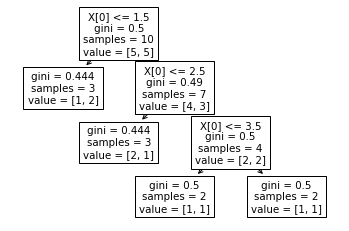

In [142]:
from sklearn import tree
from sklearn import metrics
X = a3.reshape(-1, 1)
#X = [[a1[i],a2[i]] for i in range(len(a1))]
Y = c
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
tree.plot_tree(clf)

In [144]:
y_pred = clf.predict(X)
print("Accuracy:",metrics.accuracy_score(Y, y_pred))

Accuracy: 0.6


In [627]:
def lin_reg(A, F,beta):
    W = np.array([0.01, 0.01, 0.01, 0.01])
    H = np.dot(W,A)
    print (W.shape)
    print (H.shape)
    W += beta * np.dot(A,(F - H))
    print (F - H)
    return W, H
def mae(f,W,A):
    return (1/len(f)) * np.sum(np.abs(f-np.dot(W,A))) 
def simple_per(A,C):
    W = np.array([0.01, 0.01, 0.01, 0.01])
    preds = []
    for i in range(10):
        gx = sum(A[:,i] * W)
        hx = 1 if gx>=0 else 0
        preds.append(hx)
        W = W+(2*c[i]-1)*A[:,i] if c[i]!=hx else W
    return W, preds
def forward_class(W, A):
    preds = []
    for i in range(10):
        gx = sum(A[:,i] * W)
        hx = 1 if gx>=0 else 0
        preds.append(hx) 
    return preds
def blad_klasyfikacji(C, preds):
    return sum(preds != C)/ len(C)

def log_reg(A,C, beta):
    W = np.array([0.1, 0.1, 0.1, 0.1])
    LL = 0
    preds = []
    for i in range(10):
        gx = sum(A[:,i] * W)
        pix = np.exp(gx) /(np.exp(gx)+1)
        LL += (c[i]*np.log(pix) + (1-c[i])*np.log(1 - pix))
        grad_LL = np.dot((c[i]-pix), A[:,i])
        W =+ beta*grad_LL
    return W, LL
def L2Lambdalin_reg(A,f, beta, lam):
    W = np.array([0.01, 0.01, 0.01, 0.01])
    hx = np.dot(W, A)
    part1 = 1/len(f) * np.dot(A[:3,:],(f - hx)) - lam*W[:3]
    part2 = 1/len(f) * np.sum(f - hx)
    W[:3] += beta * part1
    W[-1] += beta * part2
    return W
def L2Lambdalog_reg(A,c, beta, lam):
    W = np.array([0.1, 0.1, 0.1, 0.1])
    gx = np.dot(W, A)
    pix = np.exp(gx) /(np.exp(gx)+1)
    print (pix)
    LL = np.sum((c*np.log(pix) + (1-c)*np.log(1 - pix)))
    #grad_LL = np.dot((c[i]-pix), A[:,i])
    part1 = 1/len(f) * np.dot(A[:3,:],(c - pix)) - lam*W[:3]
    part2 = 1/len(f) * np.sum(c - pix)
    W[:3] += beta * part1
    W[-1] += beta * part2
    return W, LL
def forward_log(W, A):
    preds = []
    for i in range(10):
        gx = sum(A[:,i] * W)
        hx = np.exp(gx) /(np.exp(gx)+1)
        preds.append(hx) 
    return preds

In [628]:
w,h = lin_reg([a1,a2,a3,bias], f, 0.01)
mae(f,w,[a1,a2,a3,bias])

(4,)
(10,)
[1.95 4.93 7.91 2.95 3.93 0.96 2.95 5.91 6.92 4.92]


1.7034699999999998

In [629]:
W, preds = simple_per(A,c)

In [630]:
blad_klasyfikacji(c, preds)

0.3

In [631]:
L2Lambdalin_reg(A,f, 0.01, 0.1)
L2Lambdalog_reg(A,f, 0.01, 0.1)


[0.62245933 0.66818777 0.7109495  0.62245933 0.66818777 0.59868766
 0.62245933 0.7109495  0.68997448 0.68997448]


(array([0.15362511, 0.18742315, 0.20533307, 0.13739571]), 22.033872615929088)

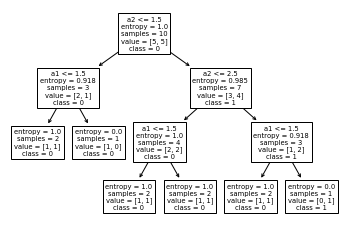

accuracy: 0.6


In [434]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

x = [[1,1],[1,2],[1,3],[2,1],[2,2],
    [1,1],[1,2],[1,3],[2,2],[2,3]]
y = [0]*5 + [1]*5

clf = tree.DecisionTreeClassifier(criterion = "entropy",
                                  splitter = "best",
                                  min_samples_split = 3)
clf.fit(x,y)
fig = plt.figure()
_ = tree.plot_tree(clf,
                   feature_names=["a1", "a2"],
                   class_names=["0", "1"])
plt.show()
y_pred = clf.predict(x)
print("accuracy: " + str(accuracy_score(y, y_pred)))


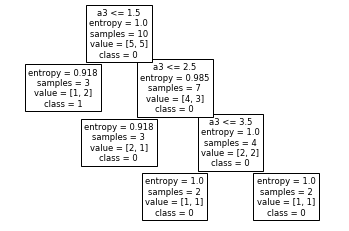

accuracy: 0.6


In [435]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

x = [[2],[3],[4],[1],[2],[1],[1],[4],[3],[2]]
y = [0]*5 + [1]*5

clf = tree.DecisionTreeClassifier(criterion = "entropy",
                                  splitter = "best",
                                  min_samples_split = 3)
clf.fit(x,y)
fig = plt.figure()
_ = tree.plot_tree(clf,
                   feature_names=["a3"],
                   class_names=["0", "1"])
plt.show()
y_pred = clf.predict(x)
print("accuracy: " + str(accuracy_score(y, y_pred)))



In [436]:
from sklearn.naive_bayes import CategoricalNB

x = [[1,1,2],[1,2,3],[1,3,4],[2,1,1],[2,2,2],
    [1,1,1],[1,2,1],[1,3,4],[2,2,3],[2,3,2]]
y = [0]*5 + [1]*5

clf = CategoricalNB(alpha = 1.0,fit_prior=False)
clf.fit(x,y)
probas = clf.predict_proba(x)
classes = clf.predict(x)

for prob, clas in zip(probas,classes):
    print("class:" + str(clas),
          "class_0_prob:" + str(round(prob[0],2)),
          "class_1_prob:" + str(round(prob[1],2)))


class:0 class_0_prob:0.69 class_1_prob:0.31
class:0 class_0_prob:0.5 class_1_prob:0.5
class:1 class_0_prob:0.4 class_1_prob:0.6
class:0 class_0_prob:0.5 class_1_prob:0.5
class:0 class_0_prob:0.6 class_1_prob:0.4
class:0 class_0_prob:0.5 class_1_prob:0.5
class:1 class_0_prob:0.4 class_1_prob:0.6
class:1 class_0_prob:0.4 class_1_prob:0.6
class:0 class_0_prob:0.5 class_1_prob:0.5
class:0 class_0_prob:0.5 class_1_prob:0.5


In [362]:
w4 = np.linspace(-1.5,1.5,num=150)
W = [-0.3, 1, -0.5]

In [373]:
errors = []
for w in w4:
    W = [-0.3, 1, -0.5, w]
    preds = forward_class(W, A)
    e = blad_klasyfikacji(c, preds)
    errors.append(e)

In [365]:
import matplotlib.pyplot as plt 

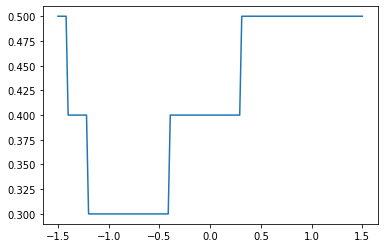

In [366]:
plt.plot(w4, errors)

In [388]:
errors = np.array(errors)

In [391]:
w4[np.where(errors==0.3)]

array([-1.19798658, -1.17785235, -1.15771812, -1.13758389, -1.11744966,
       -1.09731544, -1.07718121, -1.05704698, -1.03691275, -1.01677852,
       -0.9966443 , -0.97651007, -0.95637584, -0.93624161, -0.91610738,
       -0.89597315, -0.87583893, -0.8557047 , -0.83557047, -0.81543624,
       -0.79530201, -0.77516779, -0.75503356, -0.73489933, -0.7147651 ,
       -0.69463087, -0.67449664, -0.65436242, -0.63422819, -0.61409396,
       -0.59395973, -0.5738255 , -0.55369128, -0.53355705, -0.51342282,
       -0.49328859, -0.47315436, -0.45302013, -0.43288591, -0.41275168])

No handles with labels found to put in legend.


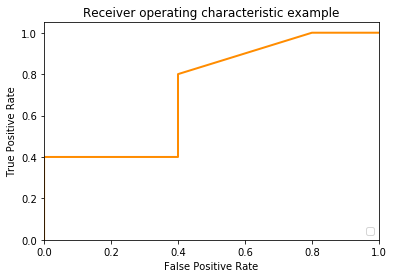

In [400]:
from sklearn.metrics import roc_curve, roc_auc_score

ns_fpr, ns_tpr, _ = roc_curve(c, p)
plt.figure()
lw = 2
plt.plot(ns_fpr, ns_tpr, color='darkorange',
         lw=lw, )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [401]:
roc_auc_score(c,p)

0.72

In [420]:
np.std([2,4,5])

1.247219128924647

In [431]:
f1 = np.array([2,5,8,3,4,1,3,6,7,5])
sum((f1 - np.average(f1))**2)

44.4

0.5

In [469]:
x= np.array([1,2,3]).reshape(3,1)
y= np.array([1,2,3]).reshape(1,3)

In [495]:
a3p = a3.reshape(10,1)
biasp = bias.reshape(10,1)
x = [[a3p[i], biasp[i]] for i in range(len(a3p))]
x = np.array(x)
x = x.reshape(10,2)
np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),f.reshape(10,1))

array([[1.63636364],
       [0.63636364]])

In [509]:
W , LL = log_reg(A, c, 0.01)
forward_log(W, A)

[0.511993763469667,
 0.517986332680851,
 0.5239737324189702,
 0.511993763469667,
 0.517986332680851,
 0.5095956734248809,
 0.5131926083865319,
 0.5239737324189702,
 0.520382009046142,
 0.5215795027068267]